In [4]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/ml-intern/Dataset.xlsx'  # Path to your Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**TASK 1**
**Predict Restaurant Ratings**
**Objective**: Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.
**Steps:**
Preprocess the dataset by handling missing values,
encoding categorical variables, and splitting the data
into training and testing sets.
Select a regression algorithm (e.g., linear regression,
decision tree regression) and train it on the training data.
Evaluate the model's performance using appropriate
regression metrics (e.g., mean squared error, R-squared)
on the testing data.
Interpret the model's results and analyze the most
influential features affecting restaurant ratings



In [5]:
!pip install scikit-learn


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/kaggle/input/ml-intern/Dataset.xlsx'  # Path to your Excel file
data = pd.read_excel(file_path)

# Step 1: Preprocessing

# 1.1 Handle Missing Values
# Checking for missing values
print("Missing values in each column:")
print(data.isnull().sum())
print(data.columns)


# Drop rows with missing aggregate rating (target variable) or handle them as needed
data = data.dropna(subset=['Aggregate rating'])

# 1.2 Encoding Categorical Variables
# List of categorical columns for encoding
categorical_cols = ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

# Applying label encoding for binary categorical variables
label_encoders = {}
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# One-hot encoding for other categorical columns
data = pd.get_dummies(data, columns=['City', 'Cuisines', 'Currency'], drop_first=True)

# Step 2: Split the Data
# Define the features and target
X = data.drop(columns=['Aggregate rating', 'ï»¿Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Rating color', 'Rating text', 'Votes'])
y = data['Aggregate rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build a Regression Model
# Model 1: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Model 2: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 4: Evaluate the Models
# Predictions on the test set
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate using Mean Squared Error and R-squared for both models
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display model performance
print(f"Decision Tree Regressor - MSE: {mse_dt}, R-squared: {r2_dt}")
print(f"Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}")

# Step 5: Interpret the Results

# For Decision Tree Regressor, check feature importances
print("Feature Importances (Decision Tree):")
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head())



Missing values in each column:
ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
De

**Task 2**
**Objective:** Create a restaurant recommendation system based on user preferences.

**Steps:**
Preprocess the dataset by handling missing
values and encoding categorical variables.
Determine the criteria for restaurant
recommendations (e.g., cuisine preference,
price range).
Implement a content-based filtering
approach where users are recommended
restaurants similar to their preferred criteria.
Test the recommendation system by
providing sample user preferences and
evaluating the quality of recommendations.



In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = '/kaggle/input/ml-intern/Dataset.xlsx'  # Path to your Excel file
data = pd.read_excel(file_path)

# Step 1: Preprocessing

# Handle Missing Values
# Remove rows where important features like Aggregate rating, Cuisines, or Price range are missing
data = data.dropna(subset=['Aggregate rating', 'Cuisines', 'Price range'])

# Encode Categorical Variables
# Encoding 'Price range' as a numeric feature
# Handle 'Price range' which may contain non-numeric characters (e.g., 'Botswana Pula(P)')
data['Price range'] = data['Price range'].apply(lambda x: ''.join([i for i in str(x) if i.isdigit()]))
data['Price range'] = pd.to_numeric(data['Price range'], errors='coerce')  # Convert to numeric, set errors as NaN

# Encoding binary categorical variables such as 'Has Table booking', 'Has Online delivery', etc.
label_encoders = {}
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# One-hot encoding for the 'Cuisines' column for content-based filtering
data['Cuisines'] = data['Cuisines'].str.split(',').apply(lambda x: ', '.join(sorted(x)))
data = pd.get_dummies(data, columns=['Cuisines'], drop_first=True)

# Step 2: Define User Preferences

def get_user_preferences(cuisines, price_range):
    """
    This function filters the dataset based on user preferences for cuisine(s) and price range.
    
    Arguments:
    - cuisines: User's preferred cuisines (comma separated string).
    - price_range: User's preferred price range (integer from 1 to 4).
    
    Returns:
    - A DataFrame containing restaurants matching the user's preferences.
    """
    user_pref = data.copy()
    
    # Filter restaurants by cuisines if provided
    if cuisines:
        cuisines_list = cuisines.split(', ')  # List of preferred cuisines
        for cuisine in cuisines_list:
            # Add a matching feature for each cuisine
            if f'Cuisines_{cuisine}' in user_pref.columns:
                user_pref = user_pref[user_pref[f'Cuisines_{cuisine}'] == 1]
    
    # Filter by price range
    if price_range:
        user_pref = user_pref[user_pref['Price range'] == price_range]
    
    return user_pref

# Step 3: Content-Based Filtering (Cosine Similarity)

def recommend_restaurants(user_pref, top_n=5):
    """
    Recommends restaurants based on user preferences using cosine similarity.
    
    Arguments:
    - user_pref: A DataFrame of restaurants filtered based on user preferences.
    - top_n: The number of top recommended restaurants to return.
    
    Returns:
    - A DataFrame of the top N recommended restaurants.
    """
    # If no restaurants match the user preference, return an empty DataFrame
    if user_pref.empty:
        return pd.DataFrame(columns=['Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating'])
    
    # Calculate cosine similarity between user preferences and the dataset
    user_pref_vector = user_pref.iloc[:, 9:].sum(axis=0).values.reshape(1, -1)  # Sum the features for cuisines and binary preferences
    restaurant_features = data.iloc[:, 9:].values  # Features to compare (excluding non-feature columns)

    # Compute cosine similarity
    similarities = cosine_similarity(user_pref_vector, restaurant_features).flatten()

    # Get top N recommended restaurants
    top_indices = similarities.argsort()[-top_n:][::-1]  # Sort by similarity, descending order
    recommended_restaurants = data.iloc[top_indices]
    
    return recommended_restaurants[['Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating']]

# Step 4: Test the Recommendation System

# Example User Preferences
user_cuisines = 'French, Japanese, Desserts	'  # Preferred cuisines (comma separated)
user_price_range = 3  # Price range preference (1 to 4 scale)

# Get User Preferences Data
user_pref = get_user_preferences(user_cuisines, user_price_range)

# Recommend Top 5 Restaurants
recommended_restaurants = recommend_restaurants(user_pref, top_n=5)

# Output the recommended restaurants
if not recommended_restaurants.empty:
    print("Recommended Restaurants based on your preferences:")
    print(recommended_restaurants)
else:
    print("No restaurants match your preferences.")


No restaurants match your preferences.


**Task 3**
**Objective: **Develop a machine learning model to
classify restaurants based on their cuisines.

**Steps:**
Preprocess the dataset by handling missing values
and encoding categorical variables.
Split the data into training and testing sets.
Select a classification algorithm (e.g., logistic
regression, random forest) and train it on the
training data.
Evaluate the model's performance using
appropriate classification metrics (e.g., accuracy,
precision, recall) on the testing data.
Analyze the model's performance across different
cuisines and identify any challenges or biases.



Accuracy: 11.98%

Classification Report:
                                                                                          precision    recall  f1-score   support

                                                                                 Afghani       0.00      0.00      0.00         1
                                                                                American       0.00      0.00      0.00         9
                                                                           American, BBQ       0.00      0.00      0.00         1
                                                                   American, BBQ, Burger       0.00      0.00      0.00         1
                                                                 American, BBQ, Southern       0.00      0.00      0.00         1
                                                                    American, BBQ, Steak       0.00      0.00      0.00         1
                                                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


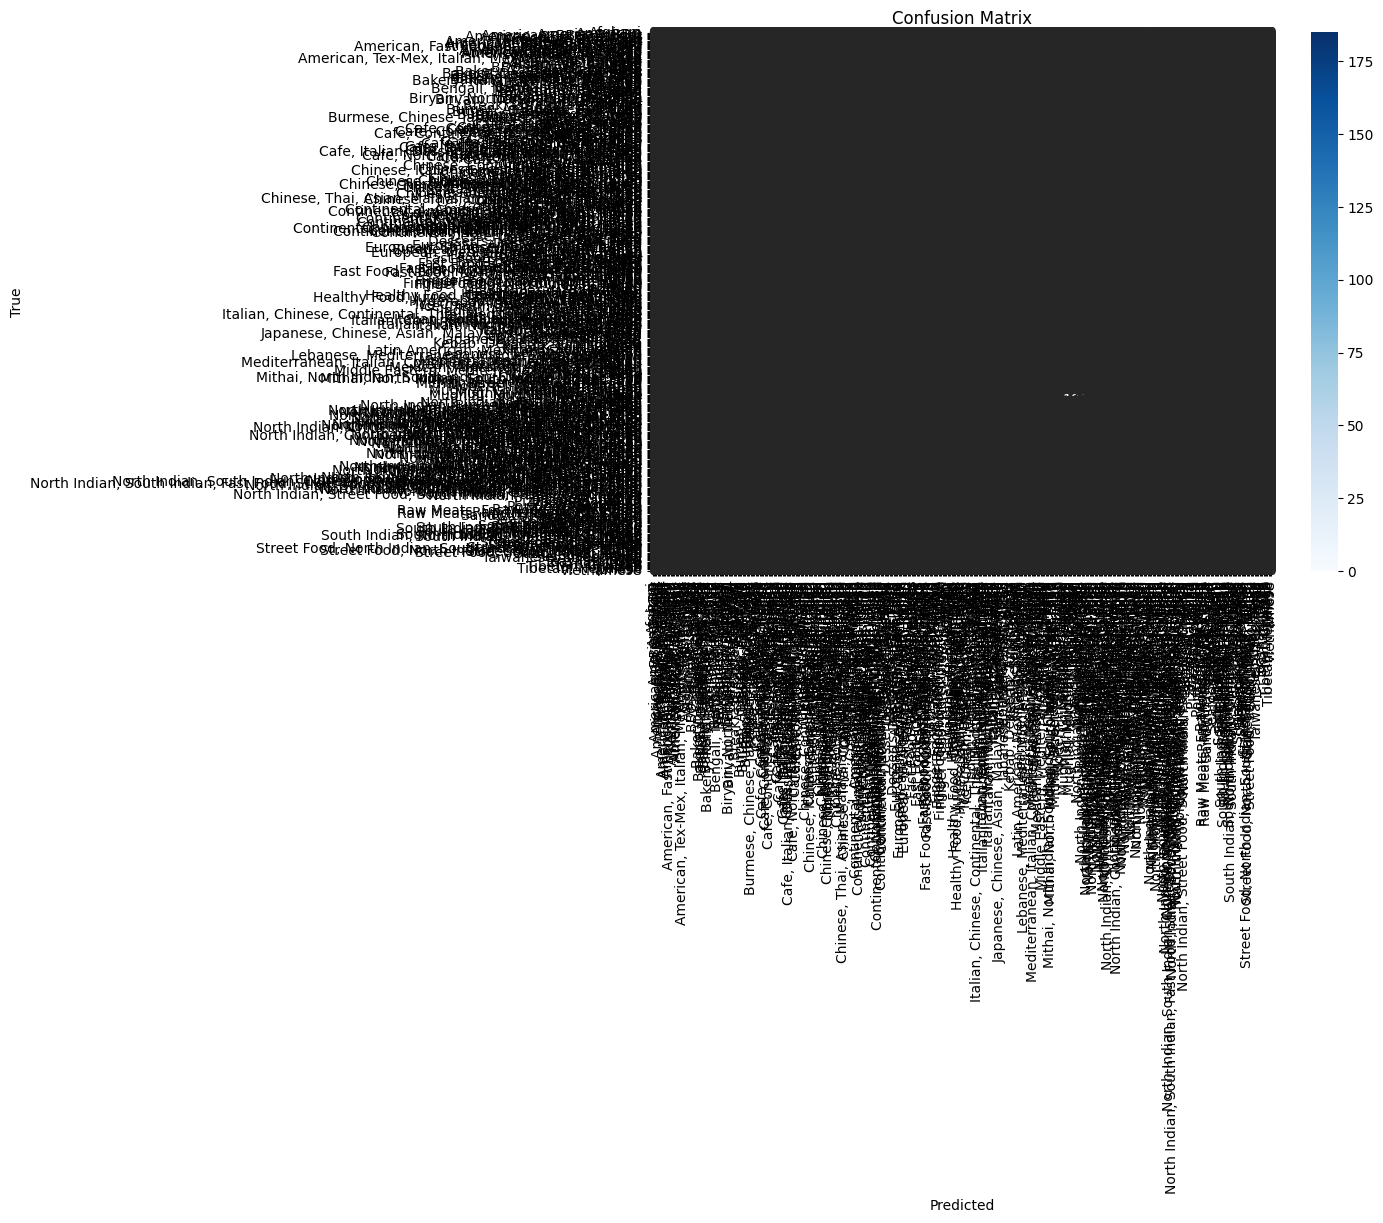

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Performance Analysis by Cuisine:
                         precision    recall  f1-score      support
Afghani                   0.000000  0.000000  0.000000     1.000000
American                  0.000000  0.000000  0.000000     9.000000
American, BBQ             0.000000  0.000000  0.000000     1.000000
American, BBQ, Burger     0.000000  0.000000  0.000000     1.000000
American, BBQ, Southern   0.000000  0.000000  0.000000     1.000000
...                            ...       ...       ...          ...
Turkish                   0.000000  0.000000  0.000000     1.000000
Vietnamese                0.000000  0.000000  0.000000     1.000000
accuracy                  0.119758  0.119758  0.119758     0.119758
macro avg                 0.003138  0.009798  0.004569  2480.000000
weighted avg              0.037159  0.119758  0.055720  2480.000000

[484 rows x 4 columns]


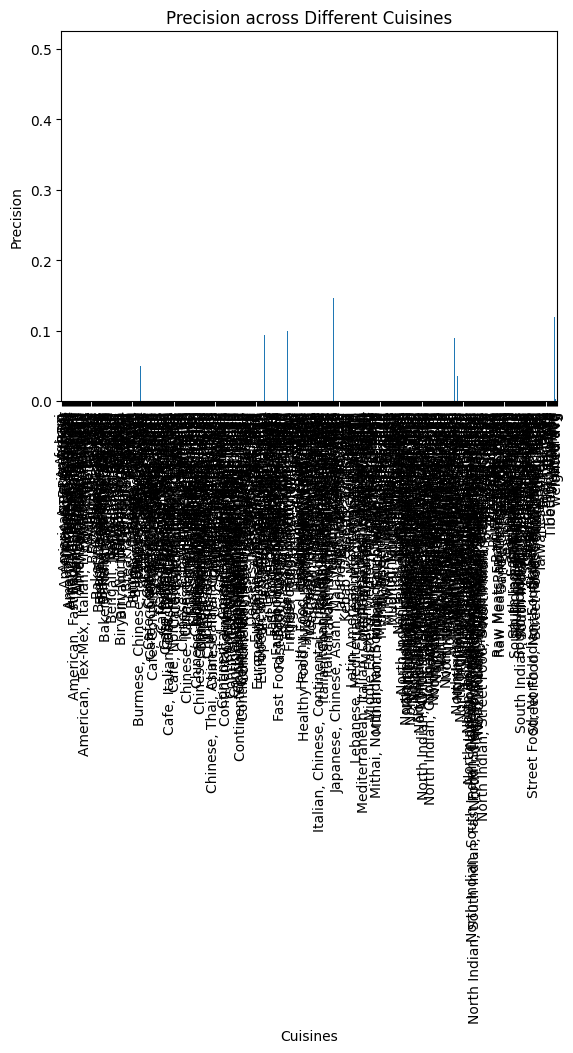

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/ml-intern/Dataset.xlsx'  # Path to your Excel file
data = pd.read_excel(file_path)

# Step 1: Preprocessing

# Handle Missing Values
data = data.dropna(subset=['Cuisines', 'Restaurant Name', 'Aggregate rating'])

# Label Encoding for the target column (Cuisines)
label_encoder = LabelEncoder()
data['Cuisines'] = label_encoder.fit_transform(data['Cuisines'])

# Encode binary categorical variables (e.g., Has Table booking, Has Online delivery)
binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in binary_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Handle 'Price range' by encoding it as a numeric variable
data['Price range'] = data['Price range'].apply(lambda x: ''.join([i for i in str(x) if i.isdigit()]))
data['Price range'] = pd.to_numeric(data['Price range'], errors='coerce')  # Convert to numeric, errors set as NaN

# Drop any remaining NaN values
data = data.dropna()

# Step 2: Feature Selection

# We will use the following columns for features: 'Price range', 'Has Table booking', 'Has Online delivery', etc.
X = data[['Price range', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']]

# Target variable: 'Cuisines' (already encoded)
y = data['Cuisines']

# Handle class imbalance: Remove classes with only one sample
class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts == 1].index
data = data[~data['Cuisines'].isin(classes_to_remove)]

# Update X and y after removing classes with only one sample
X = data[['Price range', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']]
y = data['Cuisines']

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Model Selection and Training

# Using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the Model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification metrics (precision, recall, F1-score)
# Ensure target_names are based on the unique classes in y_test
target_names = label_encoder.inverse_transform(sorted(y_test.unique()))  # Ensure correct order of classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 6: Analyze Model Performance

# Analyze the performance across different cuisines
cuisine_performance = pd.DataFrame(classification_report(y_test, y_pred, target_names=target_names, output_dict=True)).T
print("\nPerformance Analysis by Cuisine:")
print(cuisine_performance)

# Optional: You can plot the performance across different cuisines as a bar chart for better visualization
cuisine_performance.plot(kind='bar', y='precision', legend=False)
plt.title("Precision across Different Cuisines")
plt.xlabel("Cuisines")
plt.ylabel("Precision")
plt.xticks(rotation=90)
plt.show()


**Task 4**
**Objective:** Perform a geographical analysis of the restaurants in the dataset.
**Steps:**
Explore the latitude and longitude coordinates of
the restaurants and visualize their distribution on a
map.
Group the restaurants by city or locality and
analyze the concentration of restaurants in
different areas.
Calculate statistics such as the average ratings,
cuisines, or price ranges by city or locality.
Identify any interesting insights or patterns related
to the locations of the restaurants.
Task: Location-based Analysis


Map has been saved as 'restaurant_distribution_map.html'. Open this file in your browser to view the map.
            City  Avg Rating  Avg Price Range  Restaurant Count  \
88     New Delhi    2.438845         1.621597              5473   
50       Gurgaon    2.651431         1.855993              1118   
89         Noida    2.036204         1.601852              1080   
43     Faridabad    1.866932         1.454183               251   
48     Ghaziabad    2.852000         1.800000                25   
17  Bhubaneshwar    3.980952         1.857143                21   
69       Lucknow    4.195238         2.571429                21   
5       Amritsar    3.685714         1.809524                21   
2      Ahmedabad    4.161905         2.571429                21   
51      Guwahati    4.190476         2.523810                21   

    Unique Cuisines  
88              892  
50              362  
89              248  
43               87  
48               18  
17               18  
69

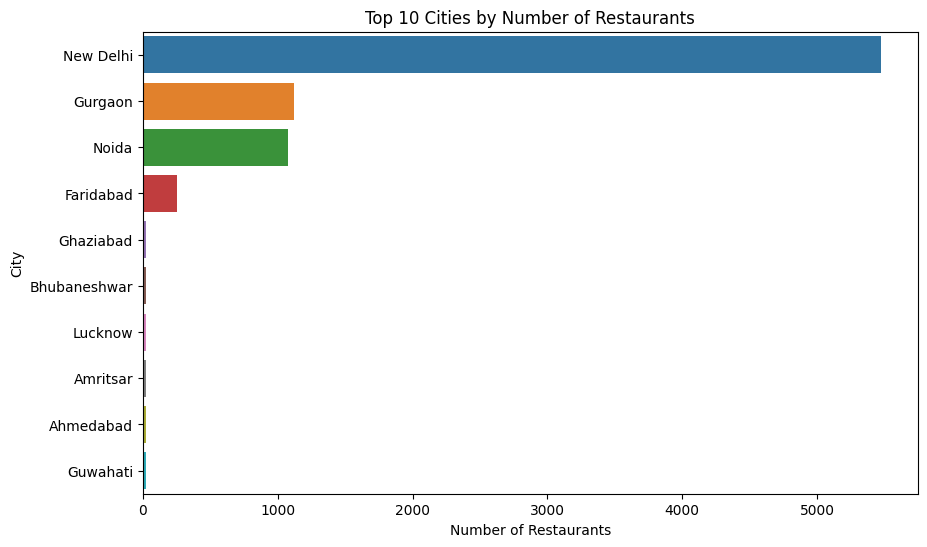

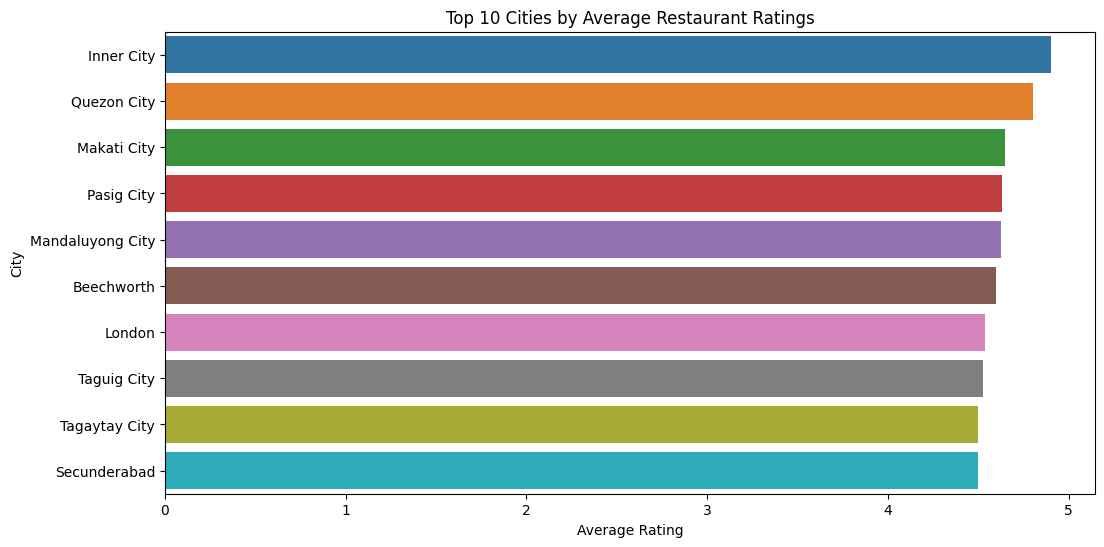

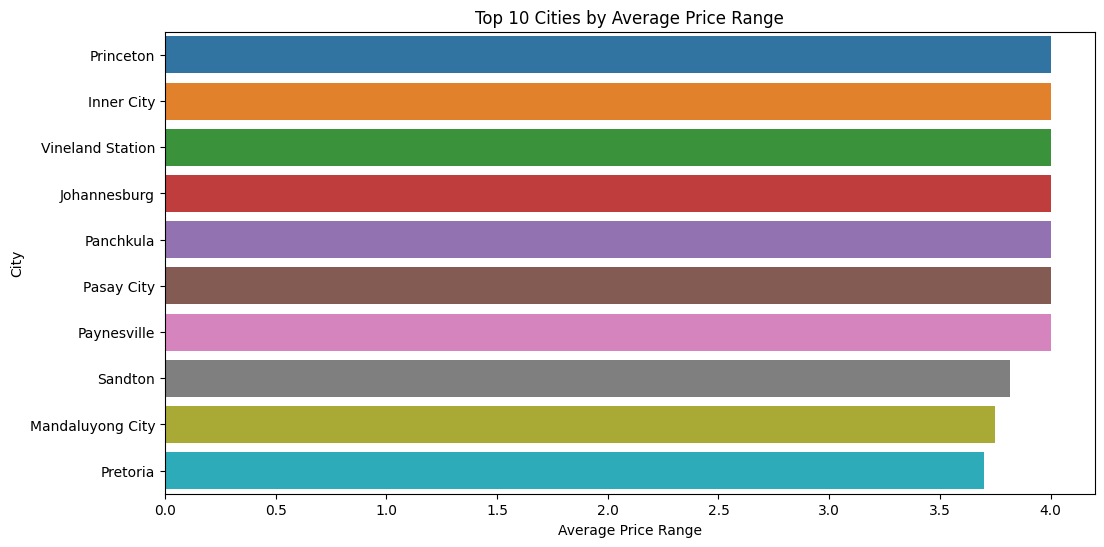

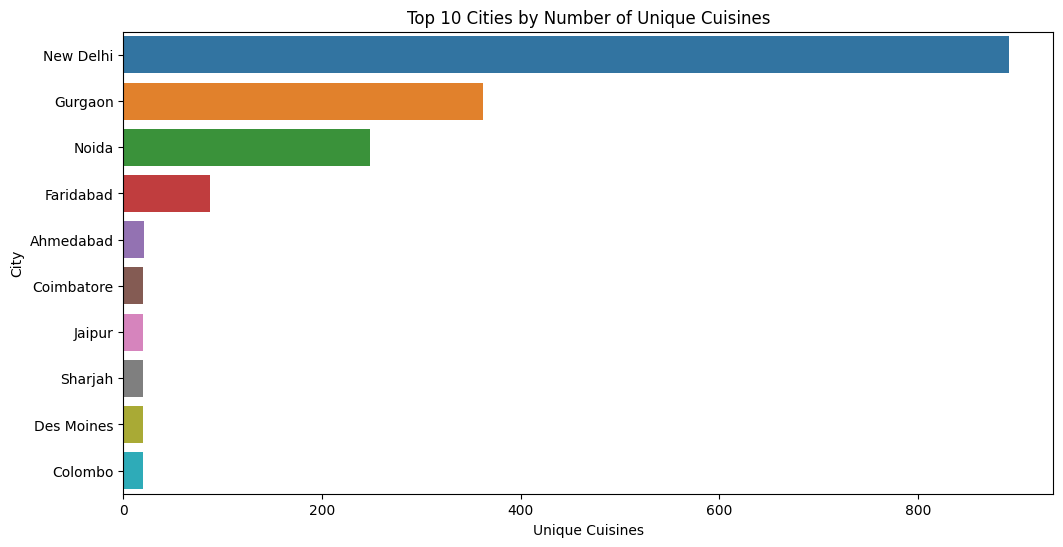

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Load the dataset
file_path = '/kaggle/input/ml-intern/Dataset.xlsx'  # Path to your dataset file
data = pd.read_excel(file_path)

# Step 1: Check if the dataset contains latitude and longitude
# Assuming the dataset has 'Latitude' and 'Longitude' columns for restaurant locations

if 'Latitude' in data.columns and 'Longitude' in data.columns:
    # Visualize the distribution of restaurants on a map
    map_center = [data['Latitude'].mean(), data['Longitude'].mean()]  # Center of the map
    map_ = folium.Map(location=map_center, zoom_start=12)

    # Add restaurant markers to the map
    marker_cluster = MarkerCluster().add_to(map_)
    for index, row in data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Restaurant Name']} ({row['Cuisines']})"
        ).add_to(marker_cluster)

    # Save the map as an HTML file to visualize it
    map_.save("restaurant_distribution_map.html")
    print("Map has been saved as 'restaurant_distribution_map.html'. Open this file in your browser to view the map.")
else:
    print("The dataset does not contain latitude and longitude coordinates.")

# Step 2: Group restaurants by city/locality
# Check if the dataset contains a 'City' or 'Locality' column
if 'City' in data.columns:
    # Group by city and calculate average statistics like rating, price range
    city_grouped = data.groupby('City').agg({
        'Aggregate rating': 'mean',
        'Price range': 'mean',
        'Restaurant Name': 'count',
        'Cuisines': 'nunique'
    }).reset_index()

    # Rename columns for better understanding
    city_grouped.columns = ['City', 'Avg Rating', 'Avg Price Range', 'Restaurant Count', 'Unique Cuisines']

    # Display the top 10 cities with the highest number of restaurants
    print(city_grouped.sort_values(by='Restaurant Count', ascending=False).head(10))

    # Step 3: Visualize the concentration of restaurants by city
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Restaurant Count', y='City', data=city_grouped.sort_values(by='Restaurant Count', ascending=False).head(10))
    plt.title('Top 10 Cities by Number of Restaurants')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('City')
    plt.show()

    # Step 4: Analyze the average ratings and price range by city
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Avg Rating', y='City', data=city_grouped.sort_values(by='Avg Rating', ascending=False).head(10))
    plt.title('Top 10 Cities by Average Restaurant Ratings')
    plt.xlabel('Average Rating')
    plt.ylabel('City')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Avg Price Range', y='City', data=city_grouped.sort_values(by='Avg Price Range', ascending=False).head(10))
    plt.title('Top 10 Cities by Average Price Range')
    plt.xlabel('Average Price Range')
    plt.ylabel('City')
    plt.show()

    # Step 5: Identify unique cuisines by city
    city_grouped['Unique Cuisines'] = city_grouped['Unique Cuisines'].astype(int)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Unique Cuisines', y='City', data=city_grouped.sort_values(by='Unique Cuisines', ascending=False).head(10))
    plt.title('Top 10 Cities by Number of Unique Cuisines')
    plt.xlabel('Unique Cuisines')
    plt.ylabel('City')
    plt.show()

else:
    print("The dataset does not contain a 'City' or 'Locality' column.")
